<a href="https://colab.research.google.com/github/MassGH2023/Supervised-Machine-Learning-Classification/blob/main/Diet_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from google.colab import files
from sklearn.preprocessing import LabelEncoder

In [2]:
# up = files.upload()

url = "https://raw.githubusercontent.com/MassGH2023/Supervised-Machine-Learning-Classification/refs/heads/main/datasets/Diet-Data.csv"

In [3]:
df = pd.read_csv(url)

In [7]:
pd.set_option('display.max_columns', None)

df.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,Yes,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,Yes,"Yes, not diagnosed by a doctor",No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,Yes,No,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [5]:
df.columns

Index(['Age', 'Weight_kg', 'Height_ft', 'Marital_Status', 'PCOS',
       'Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Mental_Health',
       'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes',
       'Childhood_Trauma', 'Cardiovascular_Disease', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')

In [9]:
df.dtypes

,0
Age,object
Weight_kg,float64
Height_ft,float64
Marital_Status,object
PCOS,object
Family_History_PCOS,object
Menstrual_Irregularity,object
Hormonal_Imbalance,object
Hyperandrogenism,object
Hirsutism,object


In [12]:
df["BMI"] = df['Weight_kg'] / ((df['Height_ft']/100) **2)

In [13]:
df.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication,BMI
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,Yes,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.,26.612956
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.,20.544420
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.,31.669026
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,Yes,"Yes, not diagnosed by a doctor",No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.,21.479005
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,Yes,No,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.,21.479005


In [16]:
df.select_dtypes("O").columns

Index(['Age', 'Marital_Status', 'PCOS', 'Family_History_PCOS',
       'Menstrual_Irregularity', 'Hormonal_Imbalance', 'Hyperandrogenism',
       'Hirsutism', 'Mental_Health', 'Conception_Difficulty',
       'Insulin_Resistance', 'Diabetes', 'Childhood_Trauma',
       'Cardiovascular_Disease', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')

In [20]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['Menstrual_Irregularity',
 'Hyperandrogenism',
 'Mental_Health',
 'Vegetarian',
 'Stress_Level',
 'Smoking']

In [21]:
df.PCOS.value_counts()

,count
PCOS,
No,134
Yes,38
"No, Yes, not diagnosed by a doctor",1


In [22]:
df["PCOS"].replace('No, Yes, not diagnosed by a doctor', 'No', inplace= True)

In [28]:
df['Hirsutism'].value_counts()

,count
Hirsutism,
No,123
Yes,48
"No, Yes, not diagnosed by a doctor",2


In [29]:
three_cols = [col for col in df.columns if df[col].nunique() == 3]
values = []
for c in three_cols:
  values.append(df[c].value_counts())

In [35]:
values

[Marital_Status
 Unmarried    156
 Married       16
 Widow          1
 Name: count, dtype: int64,
 Family_History_PCOS
 No                                                            146
 Yes                                                            26
 Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor      1
 Name: count, dtype: int64,
 Hirsutism
 No                                    123
 Yes                                    48
 No, Yes, not diagnosed by a doctor      2
 Name: count, dtype: int64,
 Insulin_Resistance
 No                                    151
 Yes                                    21
 No, Yes, not diagnosed by a doctor      1
 Name: count, dtype: int64,
 Diabetes
 No                                    169
 Yes                                     3
 No, Yes, not diagnosed by a doctor      1
 Name: count, dtype: int64,
 Childhood_Trauma
 No                                    106
 Yes                                    65
 No, Yes, not diagnosed by a doctor 

In [ ]:
df["Marital_Status"].replace(['Widow', 'Unmarried'], 'Single', inplace= True)
df["Family_History_PCOS"].replace('Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor', 'Yes', inplace= True)
df["Hirsutism"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Insulin_Resistance"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Diabetes"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Childhood_Trauma"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Cardiovascular_Disease"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True);
df["Conception_Difficulty"].replace(['Yes, not diagnosed by a doctor', 'Yes, diagnosed by a doctor', 'No, Yes, not diagnosed by a doctor'], 'Yes', inplace= True)


In [58]:
values_to_replace = [
    'I took as endocrinologist prescribed me but she said that I don\'t have PCOS',
    'Glucophage',
    "Option 2", "Yes"
]
df["PCOS_Medication"].replace(['I took as endocrinologist prescribed me but she said that I don\'t have PCOS'], 'Yes', inplace= True)
df["PCOS_Medication"].replace("No.", 'No', inplace= True)


In [56]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols, len(binary_cols)

(['Marital_Status',
  'PCOS',
  'Family_History_PCOS',
  'Menstrual_Irregularity',
  'Hyperandrogenism',
  'Hirsutism',
  'Mental_Health',
  'Conception_Difficulty',
  'Insulin_Resistance',
  'Diabetes',
  'Childhood_Trauma',
  'Cardiovascular_Disease',
  'Vegetarian',
  'Stress_Level',
  'Smoking'],
 15)

In [60]:
df.select_dtypes(include = 'number').columns

Index(['Weight_kg', 'Height_ft', 'Diet_Bread_Cereals', 'Diet_Milk_Products',
       'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables',
       'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets',
       'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 'BMI'],
      dtype='object')

In [67]:
df['Exercise_Benefit'].value_counts()

,count
Exercise_Benefit,
Somewhat,110
Yes Significantly,26
Not at All,19
Not Much,18


In [69]:
cols = ['Marital_Status',
  'PCOS',
  'Family_History_PCOS',
  'Menstrual_Irregularity',
  'Hyperandrogenism',
  'Hirsutism',
  'Mental_Health',
  'Conception_Difficulty',
  'Insulin_Resistance',
  'Diabetes',
  'Childhood_Trauma',
  'Cardiovascular_Disease',
  'Vegetarian',
  'Stress_Level',
  'Smoking', 'Diet_Bread_Cereals', 'Diet_Milk_Products',
       'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables',
       'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets',
       'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 'BMI', "Sleep_Hours", "Exercise_Benefit"]

len(cols)

29

In [70]:
data = df[cols]

In [74]:
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
binary_cols

['Marital_Status',
 'PCOS',
 'Family_History_PCOS',
 'Menstrual_Irregularity',
 'Hyperandrogenism',
 'Hirsutism',
 'Mental_Health',
 'Conception_Difficulty',
 'Insulin_Resistance',
 'Diabetes',
 'Childhood_Trauma',
 'Cardiovascular_Disease',
 'Vegetarian',
 'Stress_Level',
 'Smoking']

the following columns are ordinal and amongst them, 'Sleep_Hours'and
 'Exercise_Benefit' is not encoded yet.

In [72]:
ordinal_cols = binary_cols = [col for col in data.columns if (data[col].nunique() > 2) and col != 'BMI']
ordinal_cols

['Diet_Bread_Cereals',
 'Diet_Milk_Products',
 'Diet_Fruits',
 'Diet_Vegetables',
 'Diet_Starchy_Vegetables',
 'Diet_NonStarchy_Vegetables',
 'Diet_Fats',
 'Diet_Sweets',
 'Diet_Fried_Food',
 'Diet_Tea_Coffee',
 'Diet_Multivitamin',
 'Sleep_Hours',
 'Exercise_Benefit']

the binary columns are encoded using `pandas.get_dummies()`




In [75]:
data_enc = pd.get_dummies(data[binary_cols], drop_first= True)
data_enc

,Marital_Status_Single,PCOS_Yes,Family_History_PCOS_Yes,Menstrual_Irregularity_Yes,Hyperandrogenism_Yes,Hirsutism_Yes,Mental_Health_Yes,Conception_Difficulty_Yes,Insulin_Resistance_Yes,Diabetes_Yes,Childhood_Trauma_Yes,Cardiovascular_Disease_Yes,Vegetarian_Yes,Stress_Level_Yes,Smoking_Yes
0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,True,True,False,False,False,True,False,False,True,False
3,True,False,True,False,False,True,True,True,False,False,True,False,False,True,False
4,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,True,False,False,False,False,True,True,False,True,False,True,False,False,False,False
169,True,True,False,True,False,False,True,False,False,False,True,False,False,True,False
170,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False
171,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False


In [ ]:
data['Sleep_Hours'].value_counts()

enc_sleep =LabelEncoder()
custom_order = ['Less than 6 hours', '6-8 hours', '9-12 hours', 'More than 12 hours']
enc_sleep.fit(custom_order)
data['Sleep_Hours_enc'] = enc_sleep.transform(data['Sleep_Hours'])


In [ ]:
data['Exercise_Benefit'].value_counts()

enc_ex =LabelEncoder()
custom_order2 = ['Not at All', 'Not Much', 'Somewhat', 'Yes Significantly']
enc_ex.fit(custom_order2)
data['Exercise_Benefit_enc'] = enc_ex.transform(data['Exercise_Benefit'])
# data['Exercise_Benefit_enc']

In [92]:
# data = data.drop(columns = ["Sleep_Hours" ,	"Exercise_Benefit"], axis = 1)
data.head()

,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Vegetarian,Stress_Level,Smoking,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,BMI,Sleep_Hours_enc,Exercise_Benefit_enc
0,Single,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,26.612956,2,2
1,Single,No,No,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,20.544420,0,2
2,Single,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,31.669026,0,2
3,Single,No,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,21.479005,0,2
4,Single,No,No,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,21.479005,0,1


In [93]:
data = data.drop(columns = binary_cols, axis  = 1)
data = pd.concat([data, data_enc], axis = 1)
data.head()

,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,BMI,Sleep_Hours_enc,Exercise_Benefit_enc,Marital_Status_Single,PCOS_Yes,Family_History_PCOS_Yes,Menstrual_Irregularity_Yes,Hyperandrogenism_Yes,Hirsutism_Yes,Mental_Health_Yes,Conception_Difficulty_Yes,Insulin_Resistance_Yes,Diabetes_Yes,Childhood_Trauma_Yes,Cardiovascular_Disease_Yes,Vegetarian_Yes,Stress_Level_Yes,Smoking_Yes
0,7,7,2,2,3,1,7,3,3,7,0,26.612956,2,2,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,4,4,4,4,4,2,4,0,1,0,0,20.544420,0,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,6,2,1,3,2,1,7,1,3,7,0,31.669026,0,2,True,False,True,False,False,True,True,False,False,False,True,False,False,True,False
3,2,3,1,2,5,3,5,5,5,7,1,21.479005,0,2,True,False,True,False,False,True,True,True,False,False,True,False,False,True,False
4,4,7,2,3,4,4,6,2,3,5,0,21.479005,0,1,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False


In [94]:
features = [x for x in data.columns if x != 'PCOS_Yes']
X = data[features]
y = data['PCOS_Yes']

# Logestic Regression

In [98]:
data.shape

(173, 29)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y, random_state= 42)
logmod = LogisticRegression (random_state= 42, penalty= 'l2', solver = 'lbfgs', max_iter = 1000, class_weight='balanced')

logmod.fit(X_train, y_train)

y_pred = logmod.predict(X_test)

In [109]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [110]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.75,
 'recall': array([0.75609756, 0.72727273]),
 'precision': array([0.91176471, 0.44444444]),
 'f1score': array([0.82666667, 0.55172414])}

If one class (e.g., class 0) has significantly more samples than the other, the model might favor the majority class. This often leads to higher recall for the majority class and lower recall for the minority class.

In [111]:
probabilities = logmod.predict_proba(X_test)[:,1]
probabilities

array([0.01633926, 0.01938019, 0.83998741, 0.84594255, 0.16788507,
       0.48098672, 0.5558866 , 0.99934289, 0.08335439, 0.91979259,
       0.23194571, 0.27110553, 0.22334867, 0.12551991, 0.83365477,
       0.20375453, 0.13807932, 0.90164369, 0.01399891, 0.03281547,
       0.26664536, 0.82745923, 0.00739248, 0.23441059, 0.09674242,
       0.59689712, 0.11672203, 0.25773433, 0.10423857, 0.74241038,
       0.97238944, 0.03712349, 0.03564365, 0.01266902, 0.26392386,
       0.08448304, 0.06808418, 0.93949281, 0.07942641, 0.53177943,
       0.0116386 , 0.36771794, 0.95577138, 0.45090535, 0.78792343,
       0.97194409, 0.0135462 , 0.27313644, 0.09324674, 0.71437296,
       0.52720034, 0.25553245])

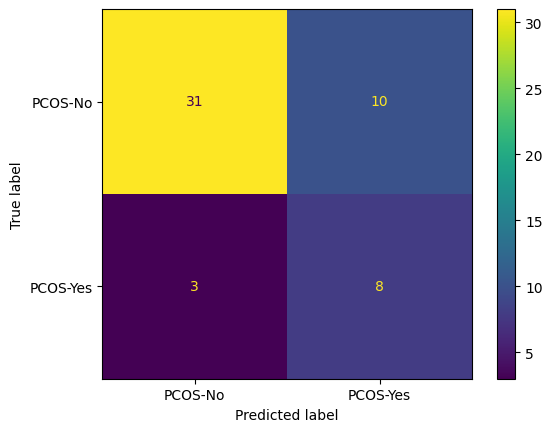

In [115]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=["PCOS-No", "PCOS-Yes"]).plot()


In [113]:
ConfusionMatrixDisplay?